# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [13]:
df = pd.read_csv(r"C:\Users\prash\Desktop\Jupyter Notebook\Data Analysis Projects\Data Job Market\data_science_job.csv")

In [15]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [17]:
print('Size of dataset: ', df.shape)

Size of dataset:  (5000, 12)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [21]:
df.work_year.unique()

array([2022, 2020, 2021], dtype=int64)

In [23]:
df.job_title.unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer  ', 'Data Analyst  in office',
       'Statistician  ', 'Data Scientist  (Remote)', 'Data Analyst  ',
       'Data Engineer  in office', 'Data Scientist  ',
       'Machine Learning Engineer  (Remote)', 'Data Engineer  ',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

# Data Cleaning

In [26]:
# Removing words

df.job_title = df.job_title.str.replace(r'\(Remote\)|in office', '', regex=True).str.strip()


In [28]:
df.job_title.unique()

array(['Machine Learning Engineer', 'Statistician', 'Data Analyst',
       'Data Scientist', 'Data Engineer'], dtype=object)

In [30]:
df.drop(columns=['job_category', 'salary', 'salary_currency'], inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   salary_in_usd       5000 non-null   int64 
 3   employee_residence  5000 non-null   object
 4   experience_level    4500 non-null   object
 5   employment_type     5000 non-null   object
 6   work_setting        5000 non-null   object
 7   company_location    5000 non-null   object
 8   company_size        4500 non-null   object
dtypes: int64(2), object(7)
memory usage: 351.7+ KB


In [32]:
df.isnull().sum()

work_year               0
job_title               0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [33]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

work_year             0
job_title             0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [37]:
df

,work_year,job_title,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...
4993,2021,Data Scientist,100031,UK,MI,FT,Hybrid,UK,M
4994,2020,Statistician,40047,JP,SE,CT,In-person,CN,L
4997,2022,Machine Learning Engineer,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,181817,US,MI,PT,Remote,DE,S


In [39]:
df.columns

Index(['work_year', 'job_title', 'salary_in_usd', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size'],
      dtype='object')

# Salary Trends Analysis

In [42]:
# Investigate the relationship between job_title, experience_level, work_setting, and salary_in_usd.
job_title_salary = df.groupby('job_title')['salary_in_usd'].mean()

In [43]:
job_title_salary

job_title
Data Analyst                 113952.993318
Data Engineer                112816.872539
Data Scientist               113505.558296
Machine Learning Engineer    113277.702002
Statistician                 115272.811384
Name: salary_in_usd, dtype: float64

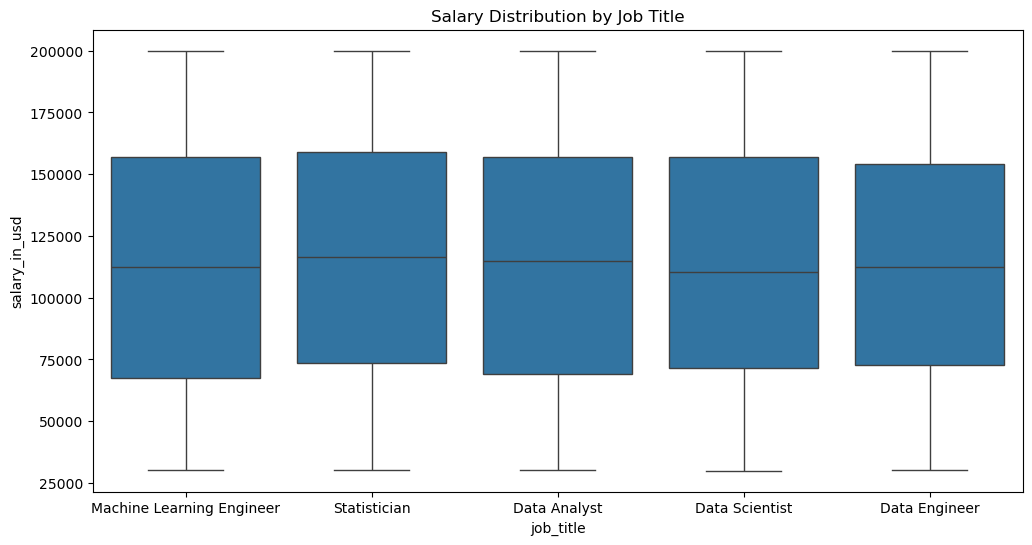

In [44]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'job_title', y = 'salary_in_usd', data=df)
plt.title('Salary Distribution by Job Title')
plt.show()


In [46]:
def salary_trends(field):
    field_salary = df.groupby(field)['salary_in_usd'].mean()
    print('Average Salary',field_salary)

    plt.figure(figsize =(5,6))
    sns.boxplot(x = field, y = 'salary_in_usd', data=df)
    plt.xticks(rotation = 90)
    plt.title(f'Salary Distribution by {field}')
    plt.show()
    



         


Average Salary work_year
2020    113778.298910
2021    115609.441781
2022    111905.525321
Name: salary_in_usd, dtype: float64


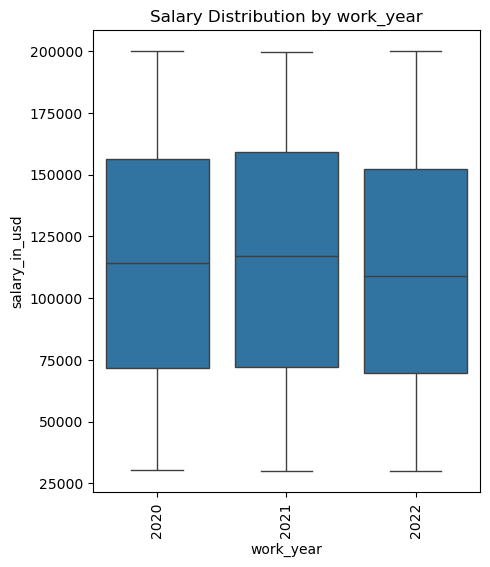

Average Salary job_title
Data Analyst                 113952.993318
Data Engineer                112816.872539
Data Scientist               113505.558296
Machine Learning Engineer    113277.702002
Statistician                 115272.811384
Name: salary_in_usd, dtype: float64


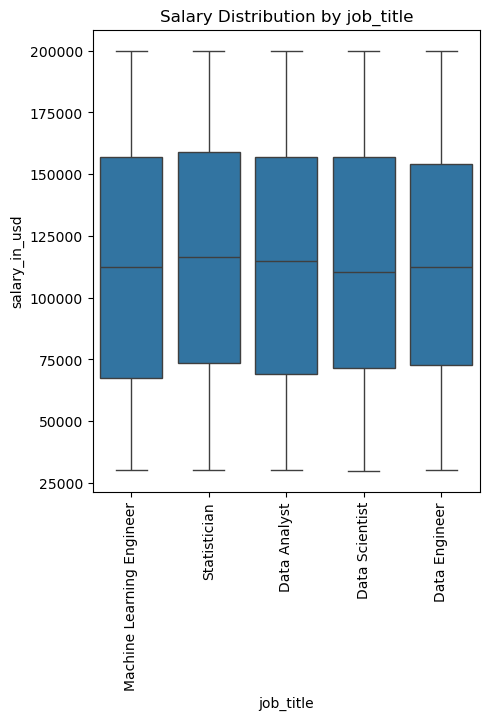

Average Salary employee_residence
CN    114229.183442
DE    113105.702028
IN    114737.917044
JP    112898.753228
MX    117795.173844
UK    111839.414075
US    111756.865116
Name: salary_in_usd, dtype: float64


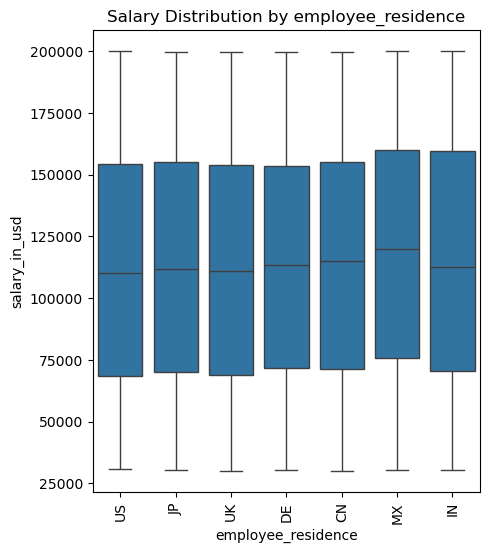

Average Salary experience_level
EN    115287.299552
EX    113394.849866
MI    113389.446043
SE    112980.065858
Name: salary_in_usd, dtype: float64


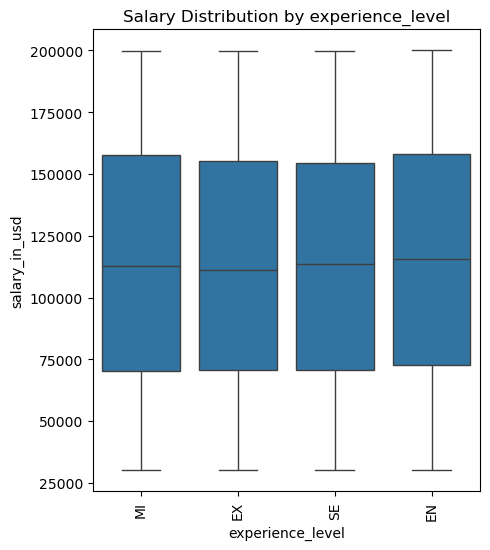

Average Salary employment_type
CT    113687.924188
FL    114366.034874
FT    111398.500896
PT    115533.611160
Name: salary_in_usd, dtype: float64


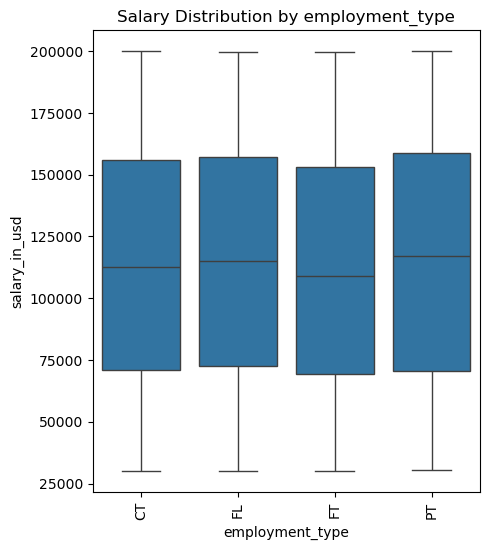

Average Salary work_setting
Hybrid       113531.743918
In-person    115218.491594
Remote       112498.797381
Name: salary_in_usd, dtype: float64


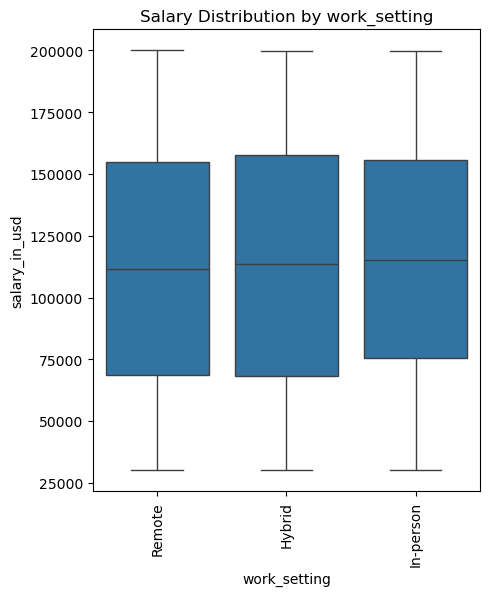

Average Salary company_location
CN    111684.788310
DE    112797.197550
IN    114262.196825
JP    115907.705401
MX    114558.887302
UK    113413.175824
US    113833.352846
Name: salary_in_usd, dtype: float64


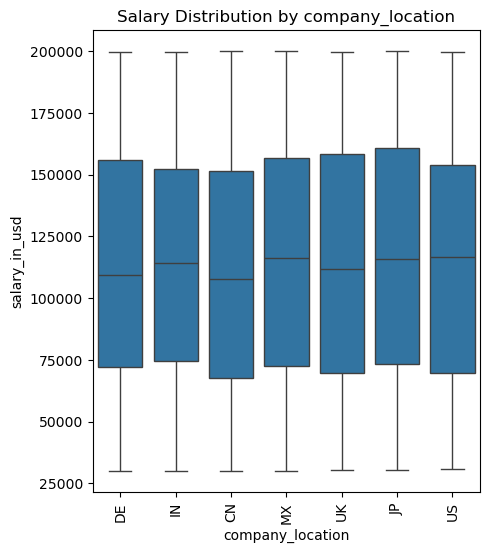

Average Salary company_size
L    114895.802596
M    113401.736981
S    113011.419355
Name: salary_in_usd, dtype: float64


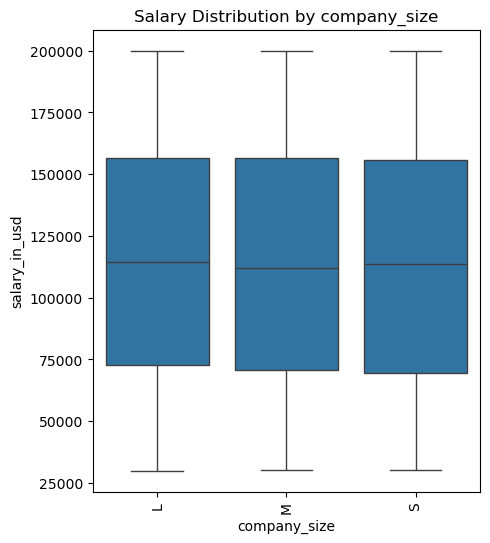

In [47]:
col = ['work_year', 'job_title', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size']
for i in col:
    salary_trends(i)

# Job Title Analysis

In [50]:
pivot = pd.crosstab(index = df.job_title, columns = df.work_setting)
pivot

work_setting,Hybrid,In-person,Remote
job_title,,,
Data Analyst,333,294,271
Data Engineer,335,324,306
Data Scientist,282,310,300
Machine Learning Engineer,302,283,264
Statistician,310,276,310


<Axes: xlabel='job_title'>

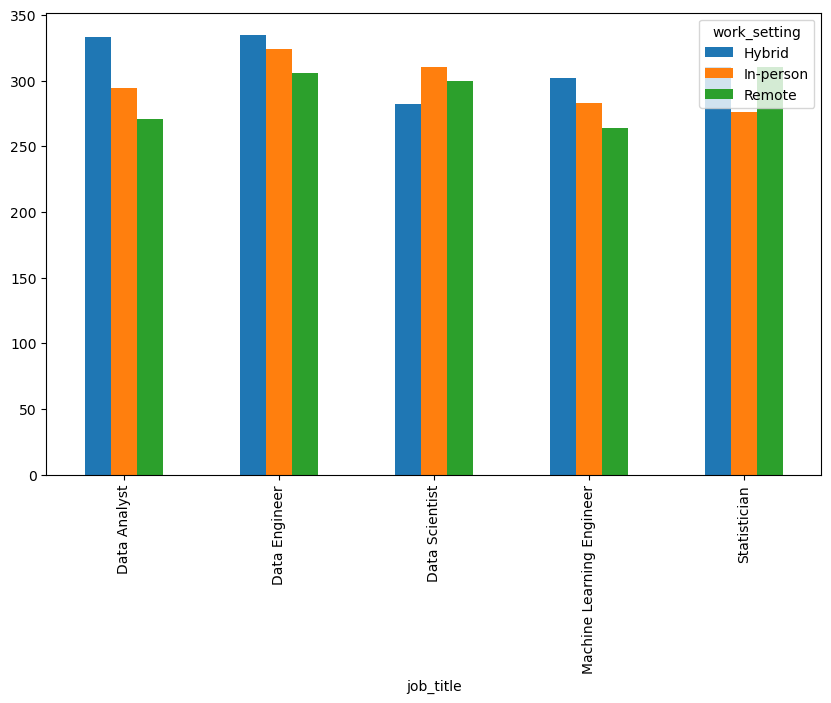

In [58]:
pivot.plot(kind = 'bar', figsize = (10,6))

In [59]:
def Job_analysis(field):
    pivot = pd.crosstab(index = df.job_title, columns = field)
    
    pivot.plot(kind = 'bar', figsize = (5,4))
    
    

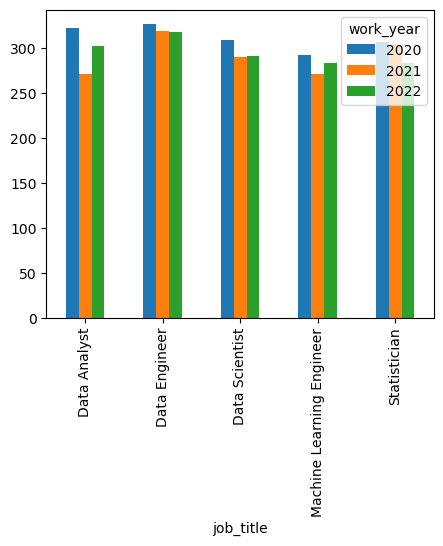

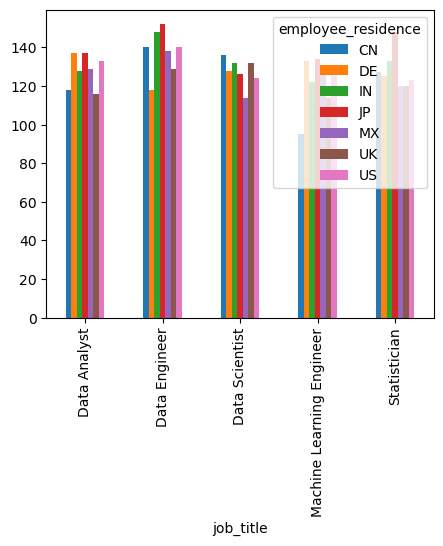

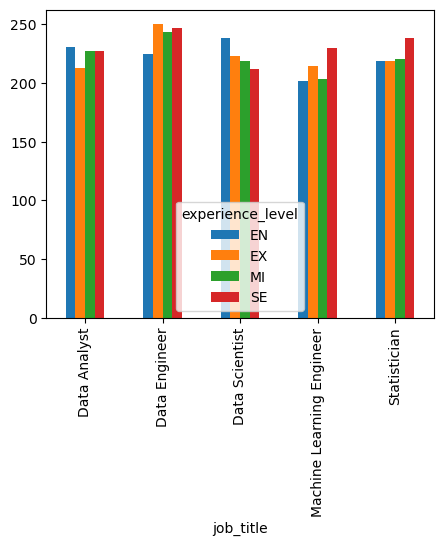

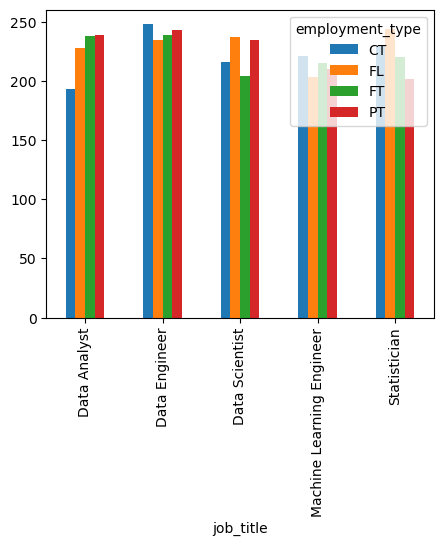

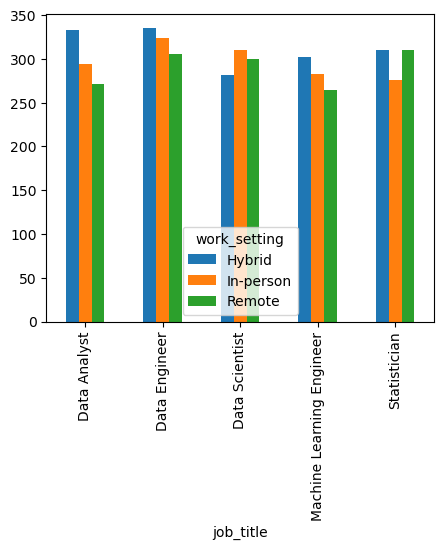

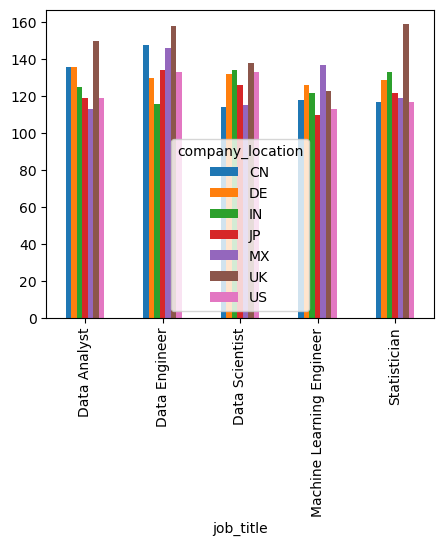

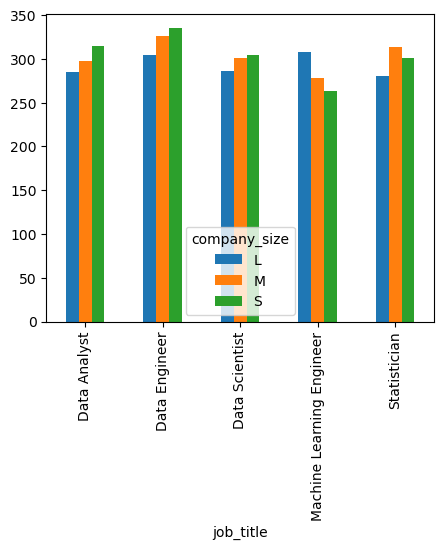

In [60]:
# Job_analysis(df.work_setting)
col = ['work_year', 'employee_residence',
       'experience_level', 'employment_type', 'work_setting',
       'company_location', 'company_size']
for i in col:
    Job_analysis(df[i])